In [1]:
import PyPDF2
import os
import re
import requests
import pandas as pd
import numpy as np
from itertools import combinations 
from itertools import permutations
from itertools import chain
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
ps = PorterStemmer()

In [2]:
courseletlist = (
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F175%2F163757167020201210_Liu_crypto_p2p_lending.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F272%2F1654160257Lesson1-1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F273%2F1654160288Lesson1-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F274%2F1654160327Lesson1-3.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F275%2F1654160374Lesson1-4.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F276%2F1654160475Lesson1-5.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F277%2F1654160518Lesson1-6.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F279%2F1654251498Lesson2-1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F278%2F1654160549Lesson1-7.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F280%2F1654251511Lesson2-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F281%2F1654251525Lesson2-3.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F103%2F20210303+IA+METIS+Reinforcement+Learning.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F107%2F1636712642CATE_meets_ML_Presentation.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F120%2F163458263420190429+Hae+Ni+LDA+DTM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F120%2F163646337920210921+Hae+Ni+LDA.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F121%2F163646358220210708+Hae+Ni+LDA+extensions.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F108%2F163595835420210530+METIS+WANG+Kalman+Filter.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F110%2F1632126441nodalida2021_summaryQuality_slides.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F112%2F163664661320211013+Ren+LI+Hae+Expectile+FRM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F114%2F1635233254Shapley.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F118%2F1636625638FRM%40EM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F119%2F163231165920210324+Wan+Hae+Li+k-expectile+clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F130%2F1633104997PAC.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F134%2F163368764620210923+Mer+Hae+GAN+Generative+Adversarial+Networks.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F139%2F163402565120211012+Kho+Hae+Trespassing+random+forests+with+a+pointed+stick+for+self+defence.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F217%2F1644582711Berlin_short_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F235%2F1649426301Variable+importance+measures+for+RF+.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F179%2F16376558632021122+SBA+JW+Hae+EPF++Quantinar.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F186%2F1645194357Presentation_Quantinar_with_videos.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F306%2FBarHan2021_talk.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F181%2F163826827620211130+LI+Hae+Case+based+Bancruptcy+prediction.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F224%2F164728525020220305+LI+Electricity+Market+Coupling.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F196%2F1642599075163458186420200403+METIS+Kho+Hae+Spectral+Clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F198%2F1642599289163231165920210324+Wan+Hae+Li+k-expectile+clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F141%2F163527012720210526+SAE+NAG+HAE+SIZ+Understanding+jumps+in+high+frequency+digital+asset+markets.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F201%2F16426862241636625638FRM%40EM_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F202%2F1642686343163774999520210912+Hae+Li+Tao+Dynamic+Crypto+Networks_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F189%2F163958119120211130+Hae+Wan+Kot+ComputerMuseum.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F183%2F1643806658KDE+ill-posed+problems.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F167%2F163699399420211115+Liu+Word+Embeddings+2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F157%2F1642778303introduction_data_science.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F180%2F16377653596.+model+assessment+-+part+4+-+appendix.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F128%2F163707553520210331_METIS_Hel_GANs_for_Time_Series.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F127%2F163458156320190528+Cea+Hae+Scagnostics.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F117%2F163458186420200403+METIS+Kho+Hae+Spectral+Clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F106%2F163458175020200914+Hae+DS2+Data+Science+%26+Digital+Society.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F190%2F1640038524Instruction+for+Creating+Quantlets.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F144%2F1636624210NNCSR_Slides.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F184%2F163888970320211207+Zin+Reu+Hae+USC+Quantinar+40+min+PDF.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F133%2F163707963820210525_Hae_Xia_Crypto_Indices-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F129%2F163458163120200915+Kim+Hae+Tri+VCRIX.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F123%2F163664570620210922+Mat+Pac+Hae+guide+hedging+CC.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F122%2F163283000220210923+Cul+Hae+Pet+Xia+Cryptocurrency+as+an+asset+class.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F116%2F163774999520210912+Hae+Li+Tao+Dynamic+Crypto+Networks.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F113%2F1632580703FRM+for+Cryptos.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F101%2F163170747120210914+Reu+DSF+Digital+Surrogate+Finance+Doc.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F97%2F163458105020210808+METIS+Win+Pricing+Kernel+Risk+Premium.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F96%2F163299370720210908_CRC21_Hae_Rodeo_or_Ascot.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F96%2F1635155323202109_RoA.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F79%2F164604019720210502+Hae+Har+Reu+Understanding+CCs.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F142%2F163627928020211107+Hae+Iva+Mat+Delaunay+Triangulation_A_Shape.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F135%2F1649084960Chapter+1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F138%2F1649094430Chapter+4.pdf',
# problematic:
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F197%2F1642599236164171878820211207+Hae+Zin+Hierarchical+Clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F241%2F1650632942Biographical+Background+Information.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F210%2F164390414020220130+METIS+Gua+Hae+Model+Selection+Criteria.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F194%2F164171878820211207+Hae+Zin+Hierarchical+Clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F170%2F163709451820211117+Hae+Qia+Network+Centrality.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F136%2F1649094328Chapter+2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F137%2F1633950248Chapter+3.pdf'
)

ids = (["id-{}".format(i+1) for i in range(len(courseletlist))])


stopwords_list = {"i","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this",'that',"that'll","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain","aren","aren't","couldn","couldn't","didn","didn't","doesn","doesn't","hadn","hadn't","hasn","hasn't","haven","haven't","isn","isn't","ma","mightn","mightn't","mustn","mustn't","needn","needn't","shan","shan't","shouldn","shouldn't","wasn","wasn't","weren","weren't","won","won't","wouldn","wouldn't"}

id_matrix = pd.DataFrame({'id': ids, 'url': courseletlist})

In [3]:
def download_pdf(file_name, url):

    '''Download a PDF file with an URL'''

    # Define HTTP Headers
    headers = {"User-Agent": "Chrome/51.0.2704.103"}
    
    # Download image
    response = requests.get(url, headers=headers)
    
    # if response is OK download the PDF and store it, else write the status
    if response.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(response.content)
    else:
        print(response.status_code)
    
    return

In [4]:
def create_string(file_name):
    
    '''Transform a PDF file to a list of string pages'''
    
    # opening the file
    imported_pdf = open(file_name, 'rb')
    
    # convert PDF to readable file
    transformed_pdf = PyPDF2.PdfFileReader(imported_pdf, strict=False)
    
    # get number of pages
    totalpages = transformed_pdf.numPages
    
    # read the data and store in a list
    pdf_output = [transformed_pdf.getPage(i) for i in range(totalpages)]
    
    # extract result
    pdf_output = [pdf_output[i].extractText() for i in range(totalpages)]
    
    return pdf_output, totalpages 

In [5]:
def cleaning(file_name):

    '''Initial PDF cleaning procedure'''
    
    pdf_output, totalpages = create_string(file_name)
    
    # # cleaning URLs
    pdf_output = [re.sub(pattern = "http[^ ]*", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning symbols
    pdf_output = [re.sub(pattern = "\\n", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = "\W|\d", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = "[^a-zA-Z]", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning multispaces
    pdf_output = [re.sub(pattern = "\s{2,}", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning out 1-2-worders
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # lower-casing
    pdf_output = [pdf_output[i].lower() for i in range(totalpages)]
    pdf_output = [[ps.stem(word) for word in sentence.split(" ")] for sentence in pdf_output]
    pdf_output = [' '.join(pdf_output[i]) for i in range(len(pdf_output))]
    
    return pdf_output, totalpages

In [6]:
def combined_pdf_creator():
    '''Creating the final master-pdf dataframe'''

    # download the first pdf
    download_pdf(ids[0], courseletlist[0])

    # clean the first pdf
    pdf_output, totalpages = cleaning(ids[0])

    # combine the pdf
    combined_pdf = [' '.join(pdf_output)]

    # iterate on above
    for i in range(1, 70):
        print(i)
        download_pdf(ids[i], courseletlist[i])
        pdf_output, totalpages = cleaning(ids[i])
        combined_pdf.append(' '.join(pdf_output))
        
    return combined_pdf

In [7]:
def input_sequence(input_initial): 

    '''Trimming input search terms to be used for the occurance matrix. The output is a generalized stemmed input form ready for checking and a count of terms for the ngram_range.'''

    # splitting the phrase by pieces
    input_general = input_initial.split(' ')

    # cleaning stopwords
    input_general = [i for i in input_general if i not in stopwords_list]

    # count words
    input_general_count = len(input_general)

    # stem the words
    input_general = [ps.stem(i) for i in input_general]

    # create the additional variations of the phrase
    outer_list = []
    for i in range(0, input_general_count):
        inner_list = [input_general[j : input_general_count-i+j] for j in range(i+1)]
        outer_list.append(inner_list)

    return input_general, input_general_count, outer_list

In [8]:
def general_occurance(input_general_count, combined_pdf): 

    '''Creation of the generalized tfidf occurance matrix based on dynamic parameters.'''

    vectorizer_general = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase=False, stop_words=stopwords_list, ngram_range=(input_general_count, input_general_count))
    X_general = vectorizer_general.fit_transform(combined_pdf)
    xx_general = pd.DataFrame(X_general.toarray(), columns = vectorizer_general.get_feature_names_out())
    return xx_general, X_general, vectorizer_general

# SVD Section
## !!! CONTINUE HERE

In [9]:
combined_pdf = combined_pdf_creator()
input_general_count = 1
xx_general, X_general, vectorizer_general = general_occurance(input_general_count, combined_pdf)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [10]:
svd_modelling = TruncatedSVD(n_components=64)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
topic_word_list = []
vocab_cleaned = [i for i in vocab if len(i) < 14]
def get_topics(components): 
    for i, comp in enumerate(components):
        terms_comp = zip(vocab_cleaned,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
    return topic_word_list
get_topics(components)

['  notsatisfi deton vyeypkodx murforblend companiesappl smapeyk paasch yi big richard',
 '  quadratisch train companiesappl straighten nakel complic flash flog chainblock jacob',
 '  gtofa explicit yaomiajmgbbb inonlinear sorensen jinp qpn repli fellow magnet',
 '  pogrom train mada companiesappl esma calm decim boulder hungari hous',
 '  impli roughli metr org competit iidenti con divid gtofa ifm',
 '  formula liber ddqn companiesmor ctional ssourc composit artilleri zeta onameopl',
 '  mainstream pngsetup manuel dxf taranto aaab either lipstick ejej digit',
 '  leibler metr roughli richard iidenti xna athen spl con scholarship',
 '  complic flash flog denc conceiv mada sill hassett tick train',
 '  scheffer advoc namecoin mathison caught athen spl declar categoris scholarship',
 '  aerodynam hart shap ddqn yule eafa hold stablecoin tsai conserv',
 '  gmm tetschen uber predictionw rein sun sdk newton bullish tree',
 '  boligomr kzi hafner aerodynam xjt napol telecom fish jpjxt iivx',

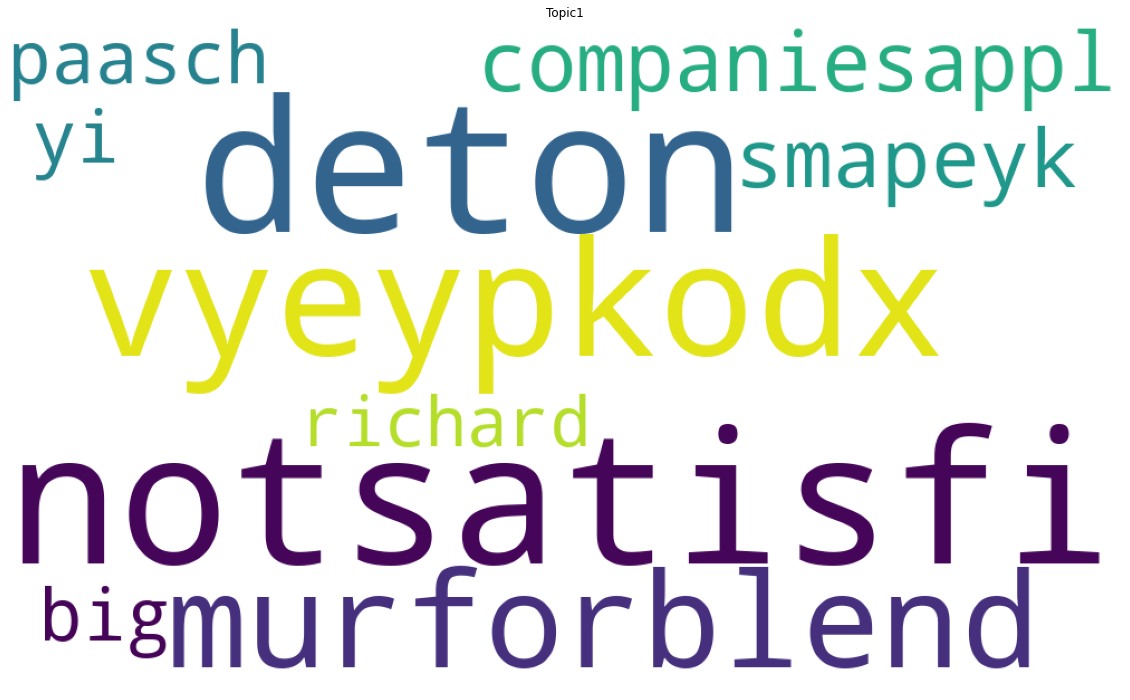

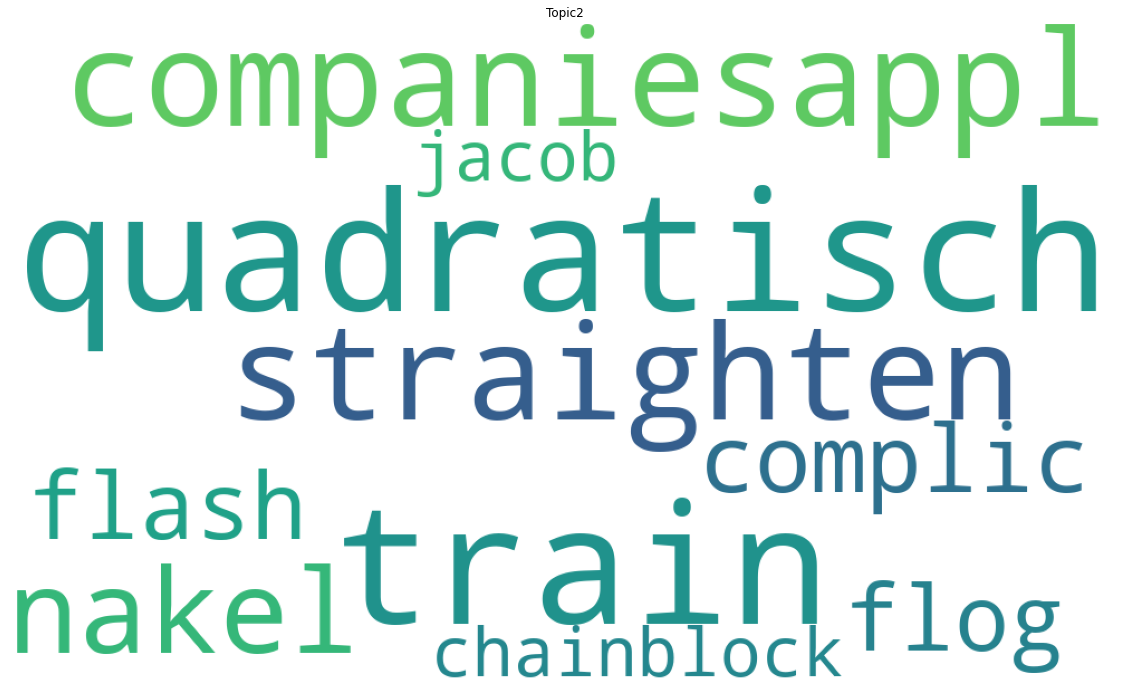

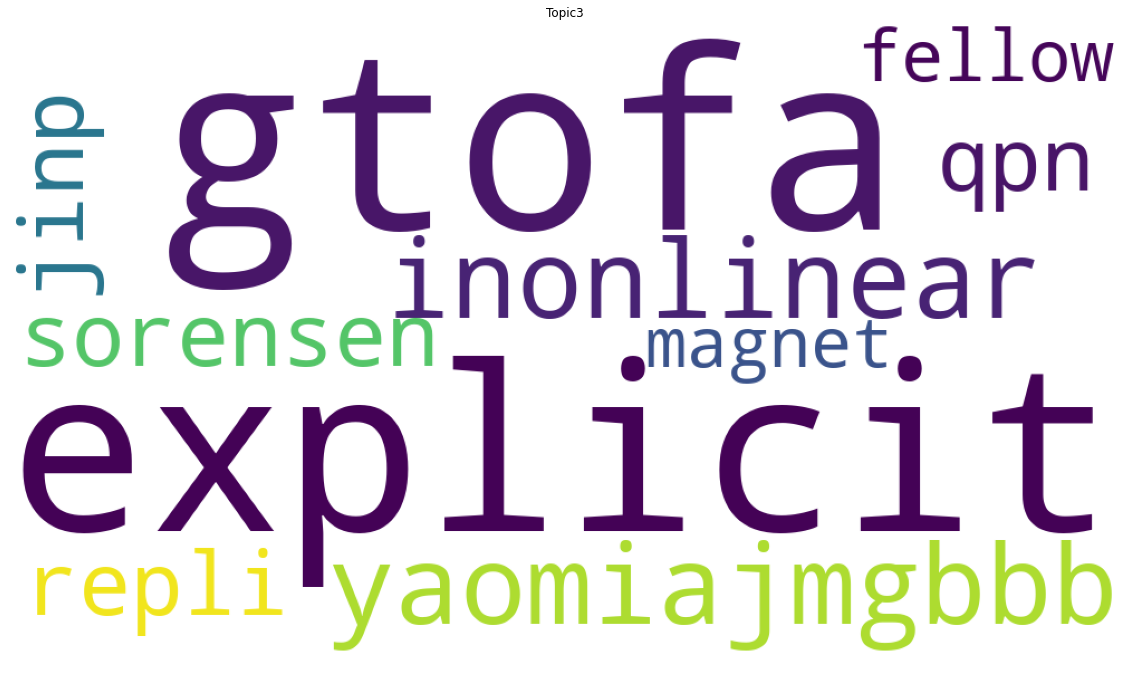

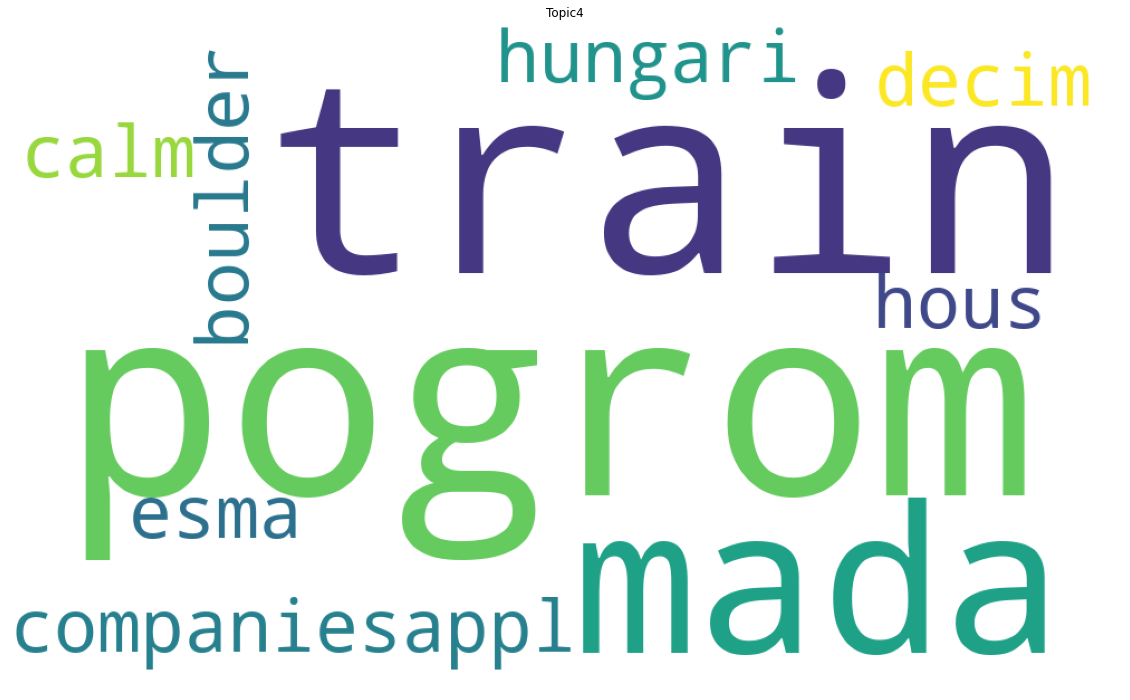

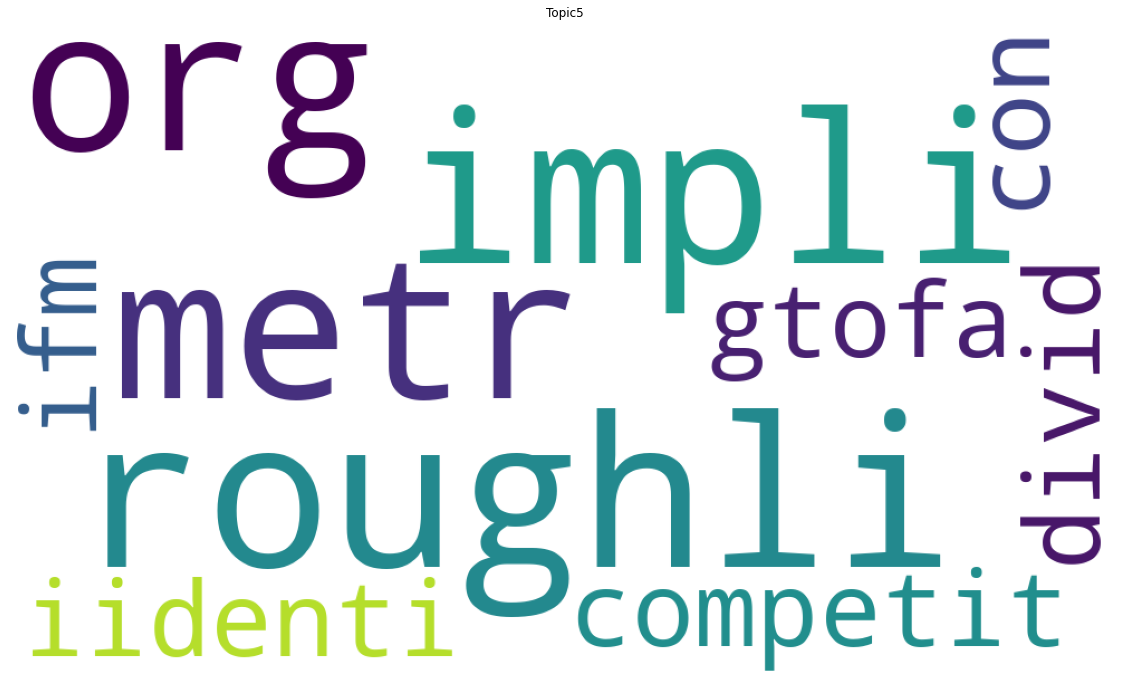

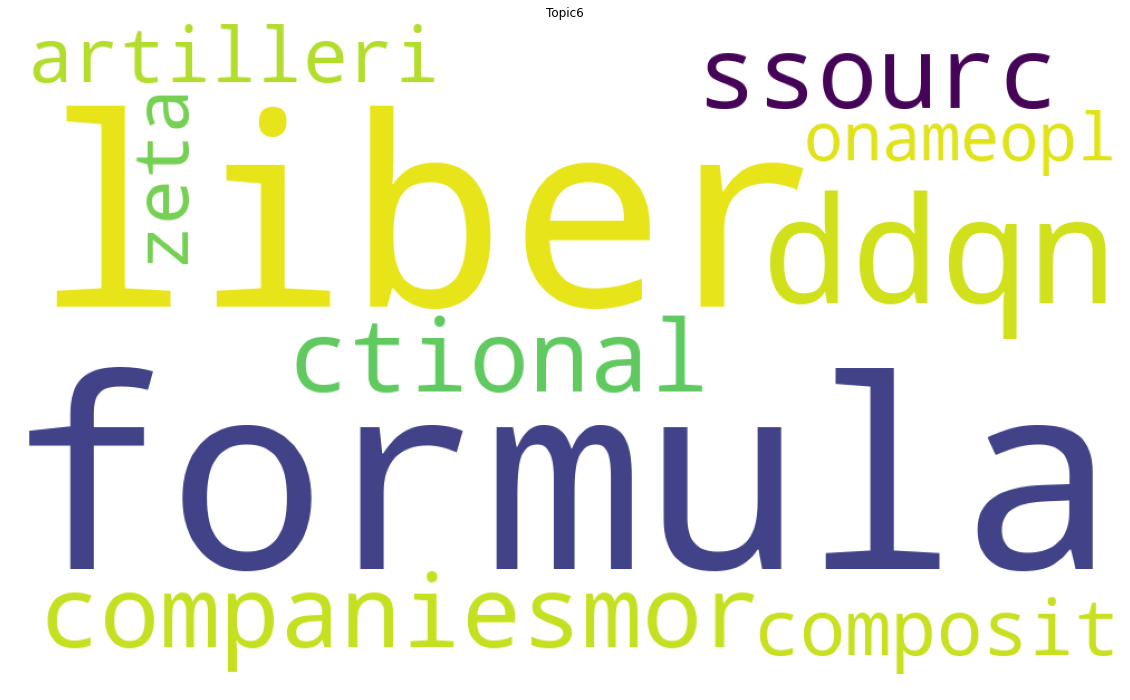

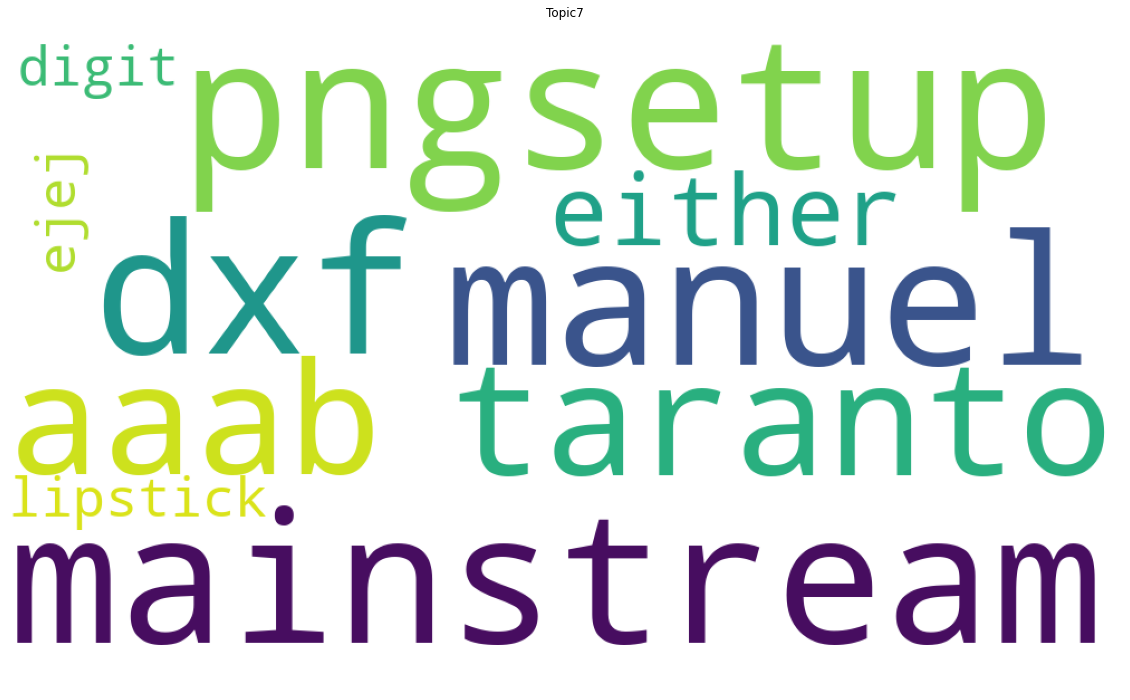

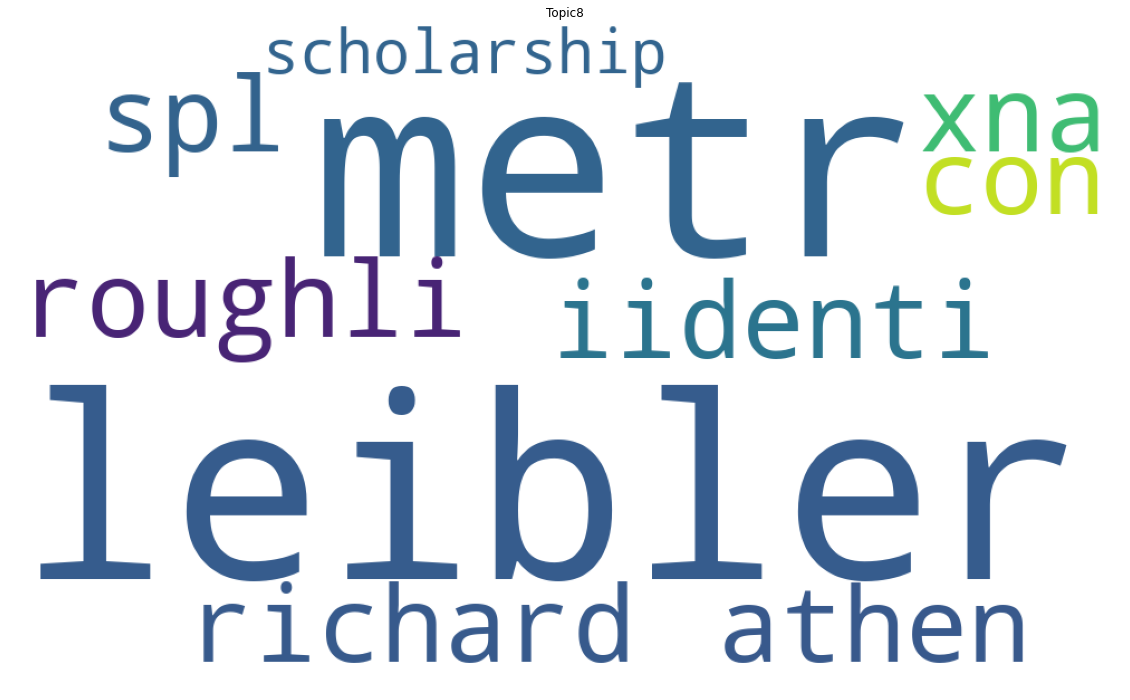

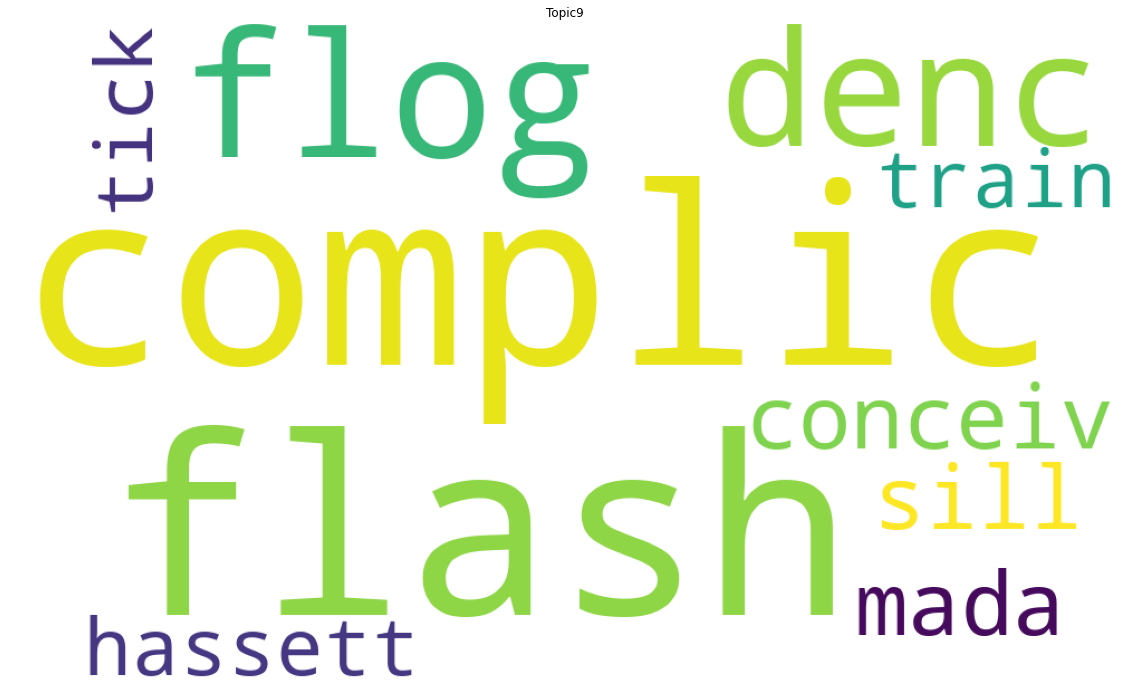

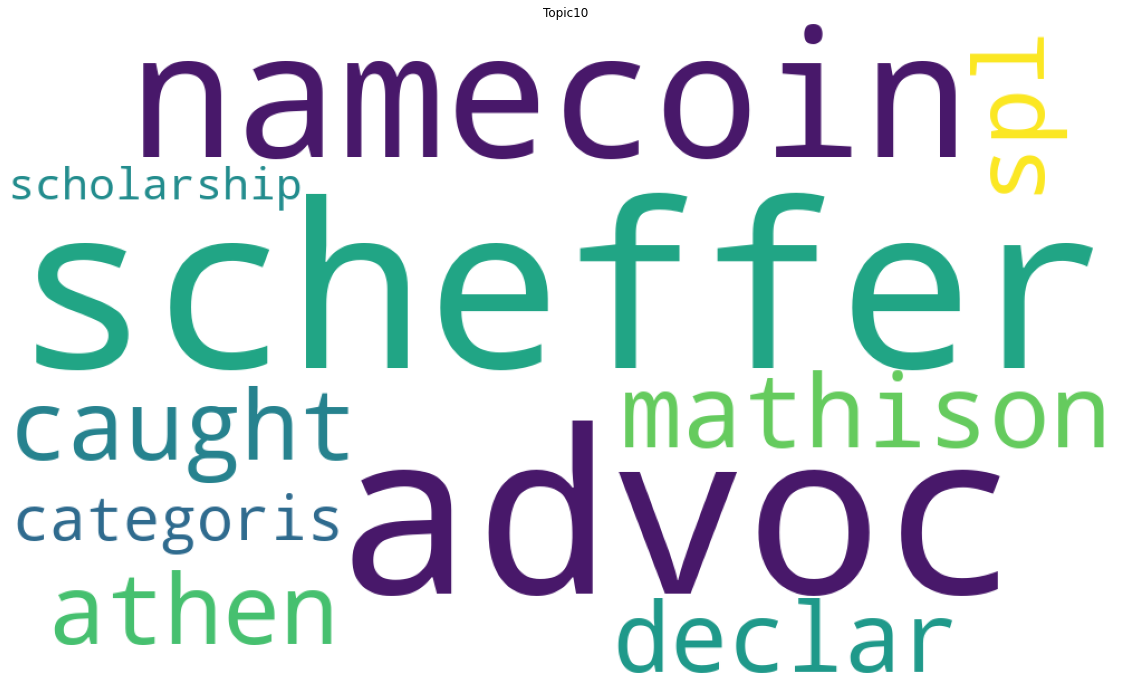

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(10):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='white', relative_scaling=0).generate(topic_word_list[i])
    plt.figure(figsize=(20, 30))
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

In [208]:
lsa = TruncatedSVD(n_components=64)
X = X_general
X_lsa = lsa.fit_transform(X)

In [43]:
weights = np.dot(km.cluster_centers_, lsa.components_)

In [50]:
print('X.shape, initial shape of tfidf matrix: ', X.shape)
print('X_lsa.shape, shape of trunkated SVD: ', X_lsa.shape)
print('lsa.components_.shape: ', lsa.components_.shape)
print('km.cluster_centers_.shape: ', km.cluster_centers_.shape)
print('weights.shape: ', weights.shape)

X.shape, initial shape of tfidf matrix:  (70, 12404)
X_lsa.shape, shape of trunkated SVD:  (70, 64)
lsa.components_.shape:  (64, 12404)
km.cluster_centers_.shape:  (6, 64)
weights.shape:  (6, 12404)


In [48]:
features = vectorizer_general.get_feature_names_out()
weights = np.abs(weights)
for i in range(km.n_clusters):
    top5 = np.argsort(weights[i])[-5:]
    print(list(zip([features[j] for j in top5], weights[i, top5])))

[('vti', 0.11870372931082686), ('insolv', 0.13093577696116976), ('solvent', 0.14817587983119435), ('cbr', 0.15473026274741106), ('bankruptci', 0.19605311912071877)]
[('price', 0.022459958381160057), ('time', 0.022596484312122158), ('market', 0.023686276674340624), ('data', 0.024183921240262966), ('model', 0.0259956507798263)]
[('cut', 0.14071804049735814), ('clusteringgraph', 0.1469270583791374), ('evec', 0.1469270583791374), ('eval', 0.1469270583791374), ('spectral', 0.16492721823229067)]
[('groupgngg', 0.09923404133844765), ('rett', 0.10471337976388789), ('rohe', 0.10471337976388789), ('groupg', 0.11364643672666111), ('nvcpinkrddstratxbcbtsburstdgbdogeltcardrgntlskpascxrpbtcetcethomniscdashdcrfctgnonmrdynam', 0.1828144758434599)]
[('dirichlet', 0.07980660584407666), ('sha', 0.08061607255763314), ('lda', 0.09205943971943295), ('null', 0.10812711318363778), ('latexit', 0.11933486826752342)]
[('clusterclust', 0.10434438886329876), ('vtau', 0.11010590186494895), ('xij', 0.110424239967074

In [47]:
print('features: ', features.shape)
print('weights: ', weights.shape)

features:  (12404,)
weights:  (6, 12404)


In [96]:
component_test = []
for i in range(1,70):
    lsa_obj = TruncatedSVD(n_components=i)
    tfidf_lsa_data_one = lsa_obj.fit_transform(X_general)
    component_test.append(lsa_obj.explained_variance_ratio_.sum())
component_test_plot = pd.DataFrame({'components': range(1,70), 'explained_var' : component_test})

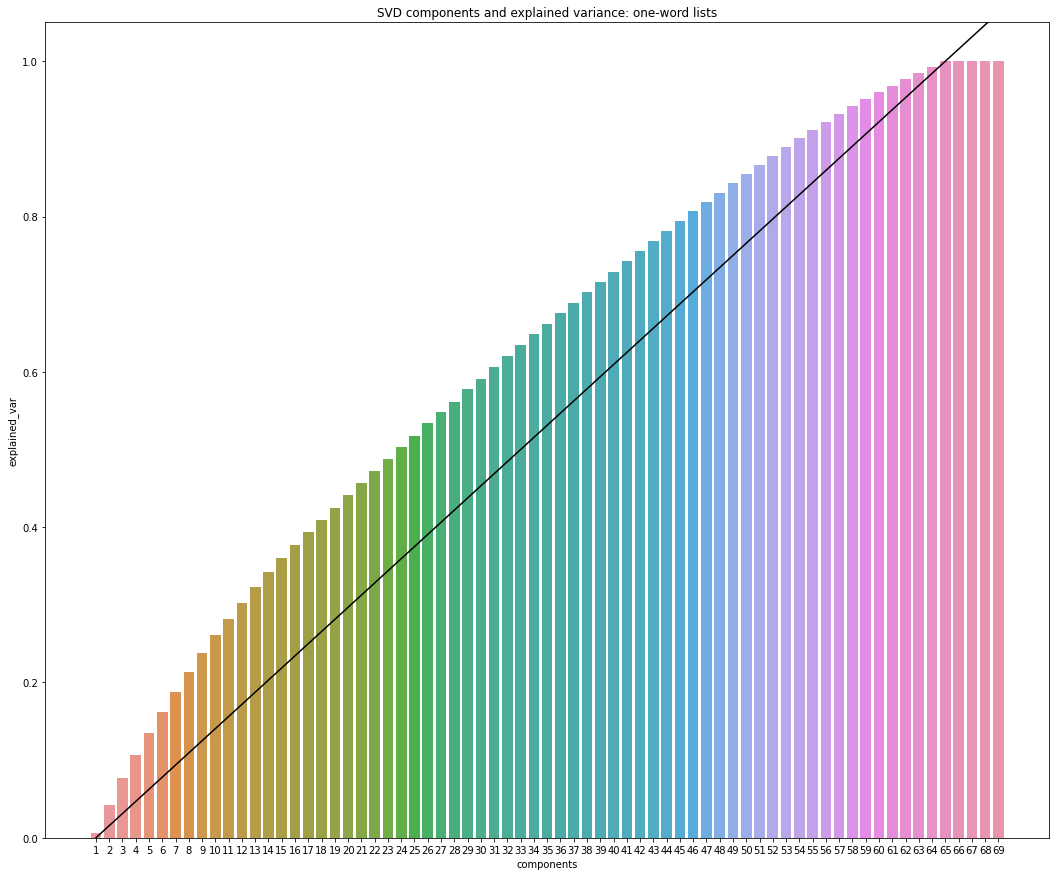

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 15)
sns.barplot(x = component_test_plot.components, y = component_test_plot.explained_var).set(title='SVD components and explained variance: one-word lists')
ax.axline((0,0), (64,1), color = 'k')

In [150]:
svd_modelling = TruncatedSVD(n_components=6)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names_out()
svd_lsa = svd_modelling.fit_transform(X_general)
svd_lsa = pd.DataFrame(svd_lsa, columns=list('abcdef'))

<AxesSubplot:>

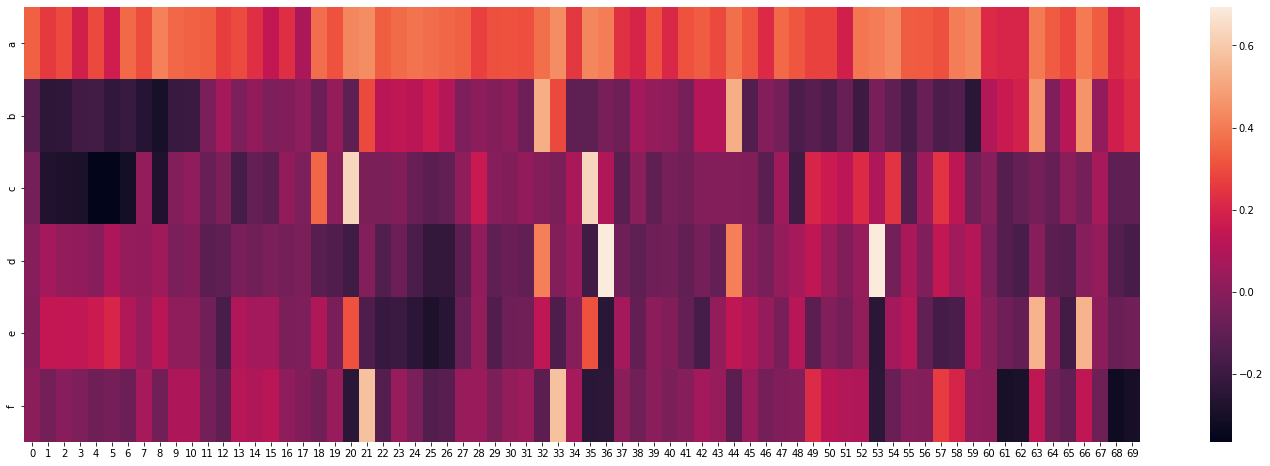

In [203]:
svd_modelling = TruncatedSVD(n_components=6)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names_out()
svd_lsa = svd_modelling.fit_transform(X_general)
svd_lsa = pd.DataFrame(svd_lsa, columns=list('abcdef'))
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.heatmap(svd_lsa.T)

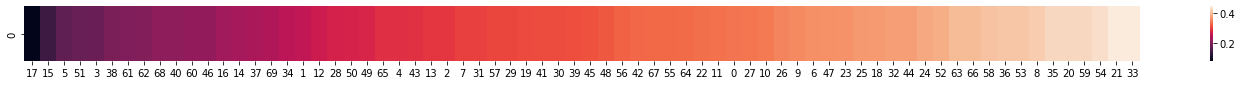

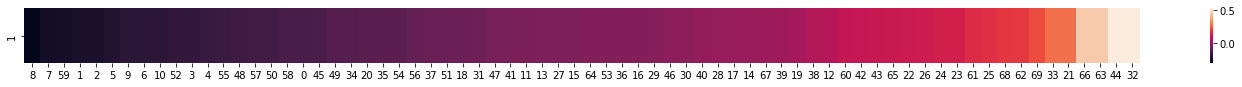

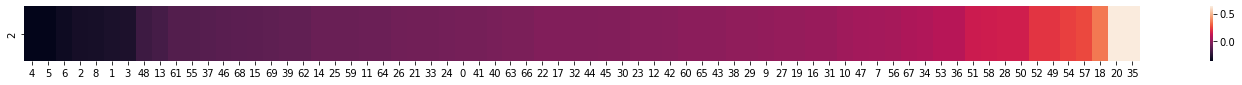

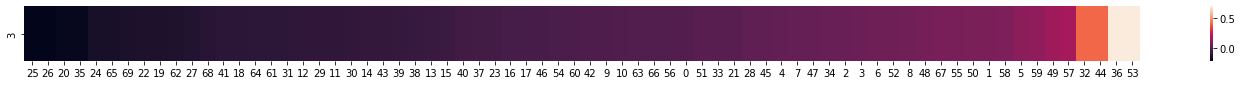

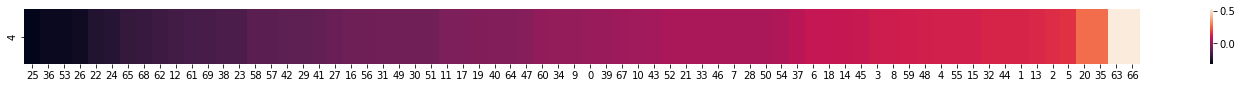

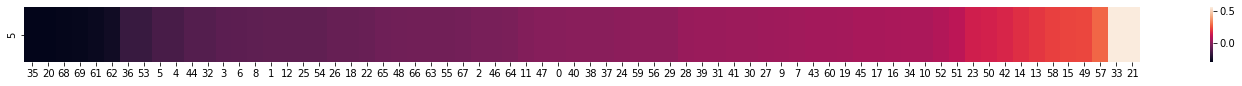

In [205]:
svd_modelling = TruncatedSVD(n_components=6)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names_out()

for i in range(6):
    svd_lsa = svd_modelling.fit_transform(X_general)
    svd_lsa = pd.DataFrame(svd_lsa)
    svd_lsa = svd_lsa.iloc[:, i:i+1]
    svd_lsa = svd_lsa.sort_values(by = svd_lsa.columns[0])
    fig, ax = plt.subplots()
    fig.set_size_inches(25,1)
    sns.heatmap(svd_lsa.T)

<AxesSubplot:>

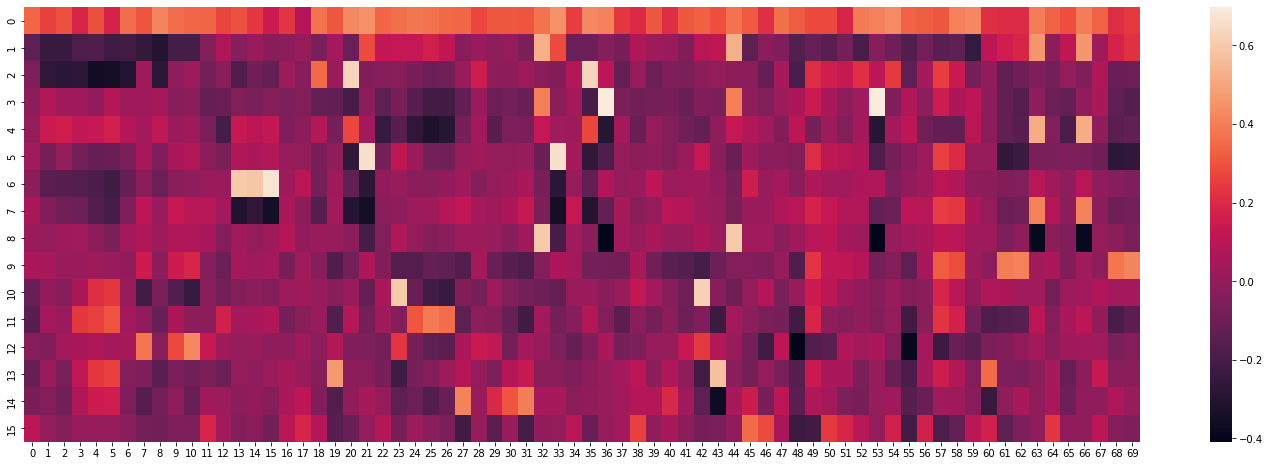

In [206]:
svd_modelling = TruncatedSVD(n_components=16)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names_out()
svd_lsa = svd_modelling.fit_transform(X_general)
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.heatmap(svd_lsa.T)

<AxesSubplot:>

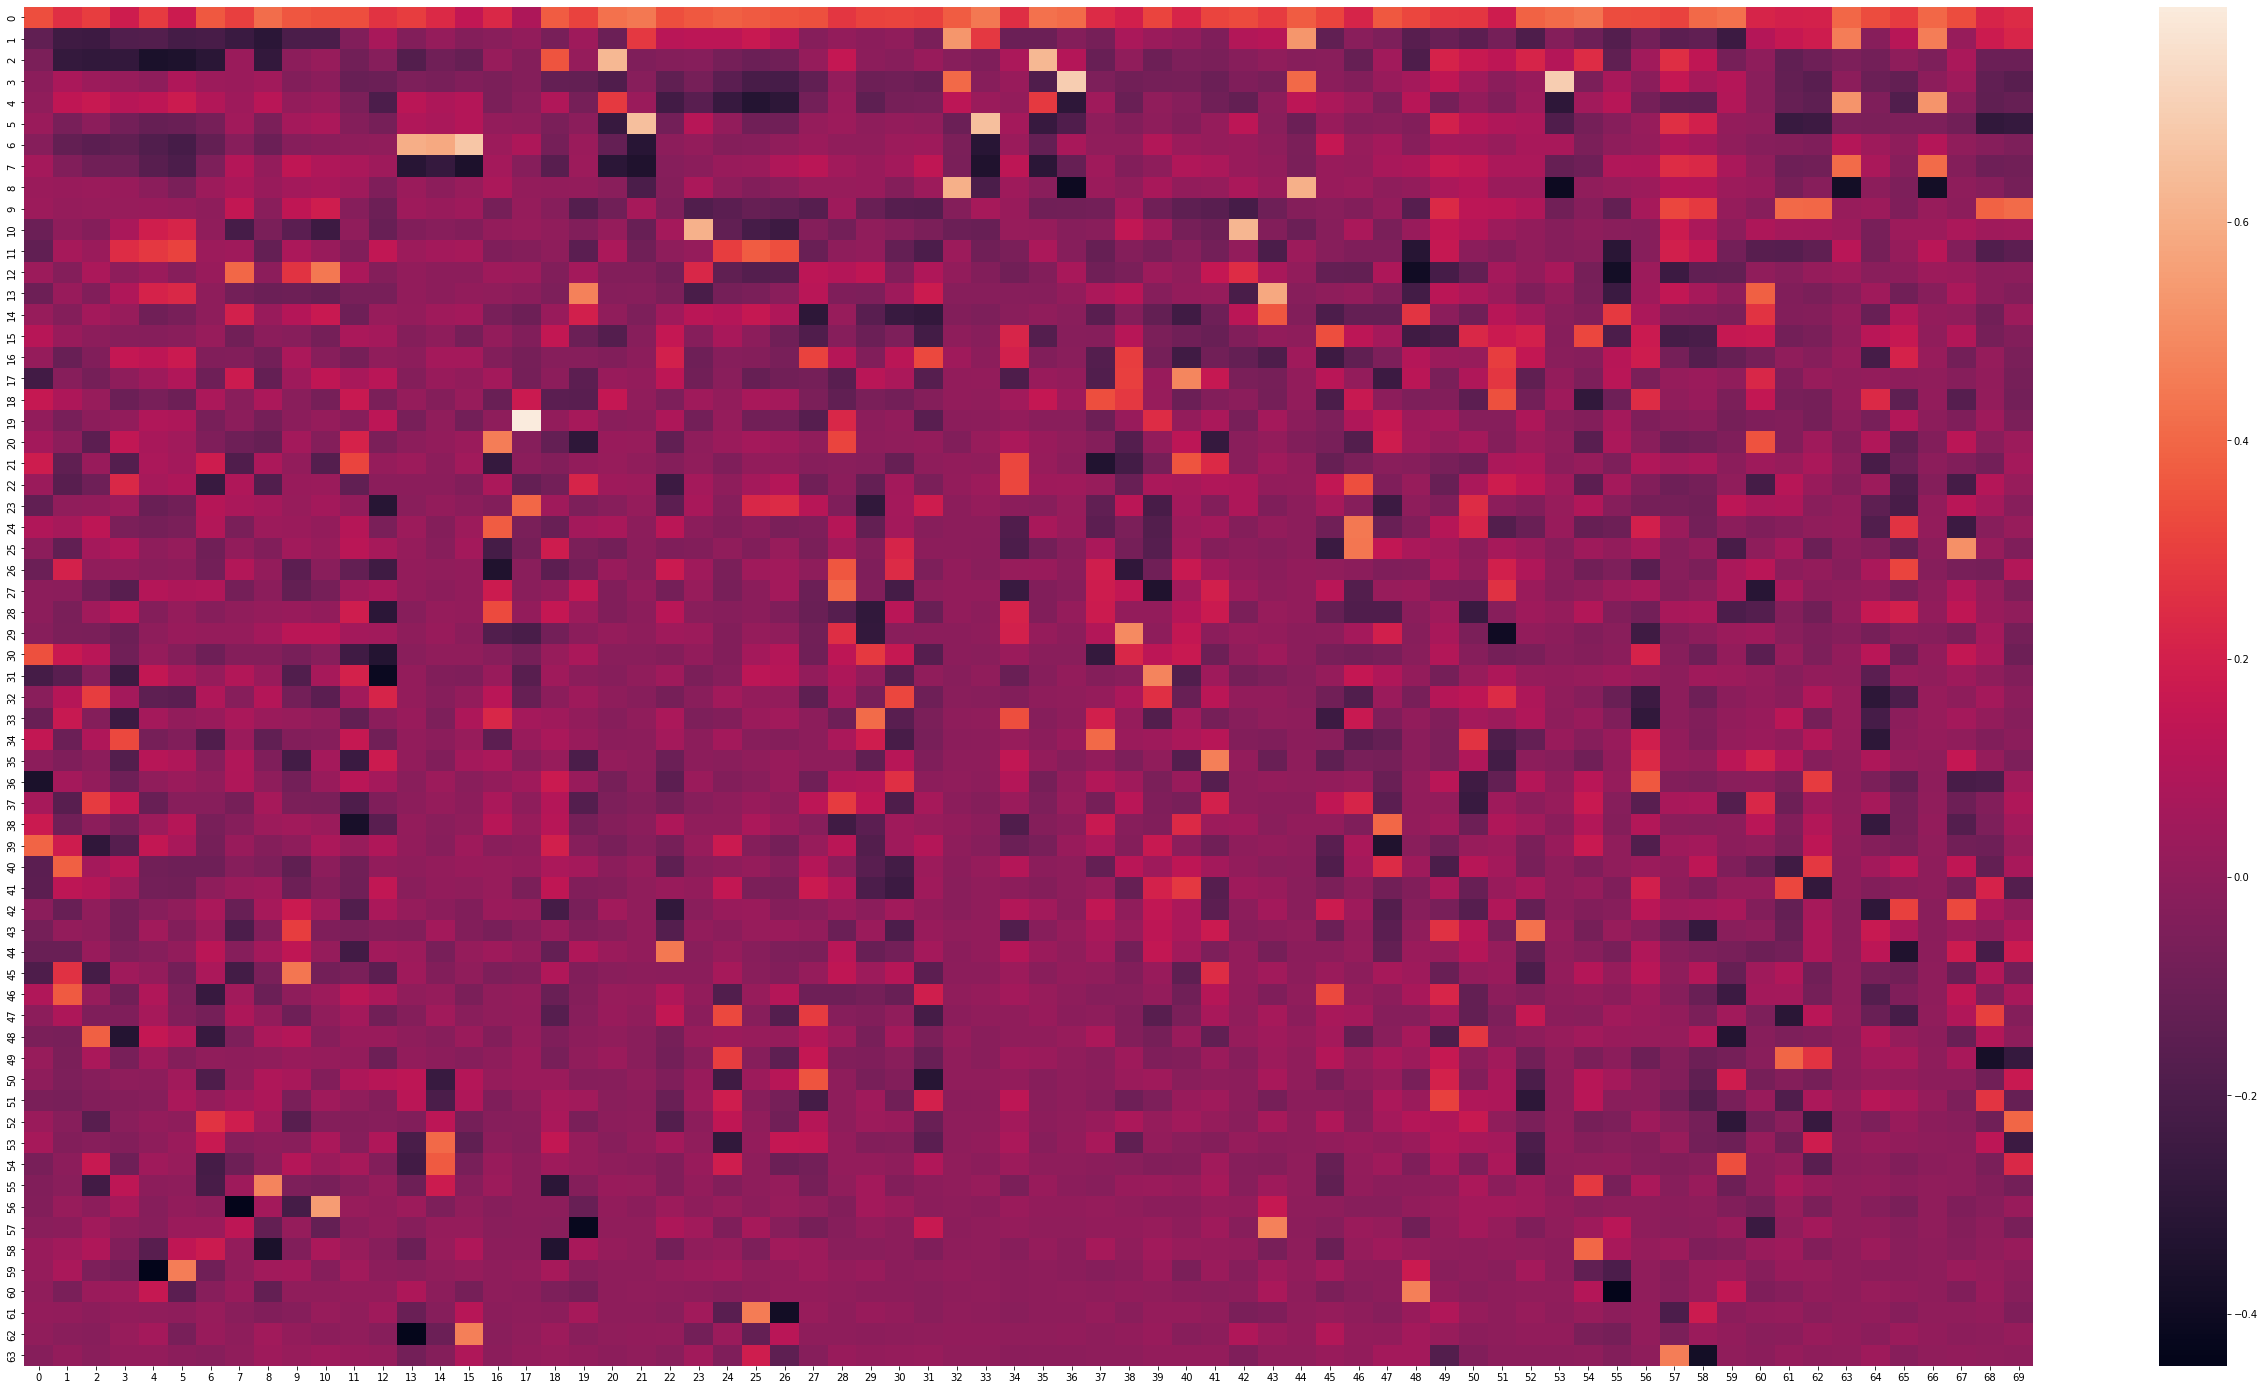

In [227]:
svd_modelling = TruncatedSVD(n_components=64)
svd_modelling.fit_transform(X_general)
components = svd_modelling.components_
vocab = vectorizer_general.get_feature_names_out()
svd_lsa = svd_modelling.fit_transform(X_general)
fig, ax = plt.subplots()
fig.set_size_inches(45,25)
sns.heatmap(svd_lsa.T)

<AxesSubplot:>

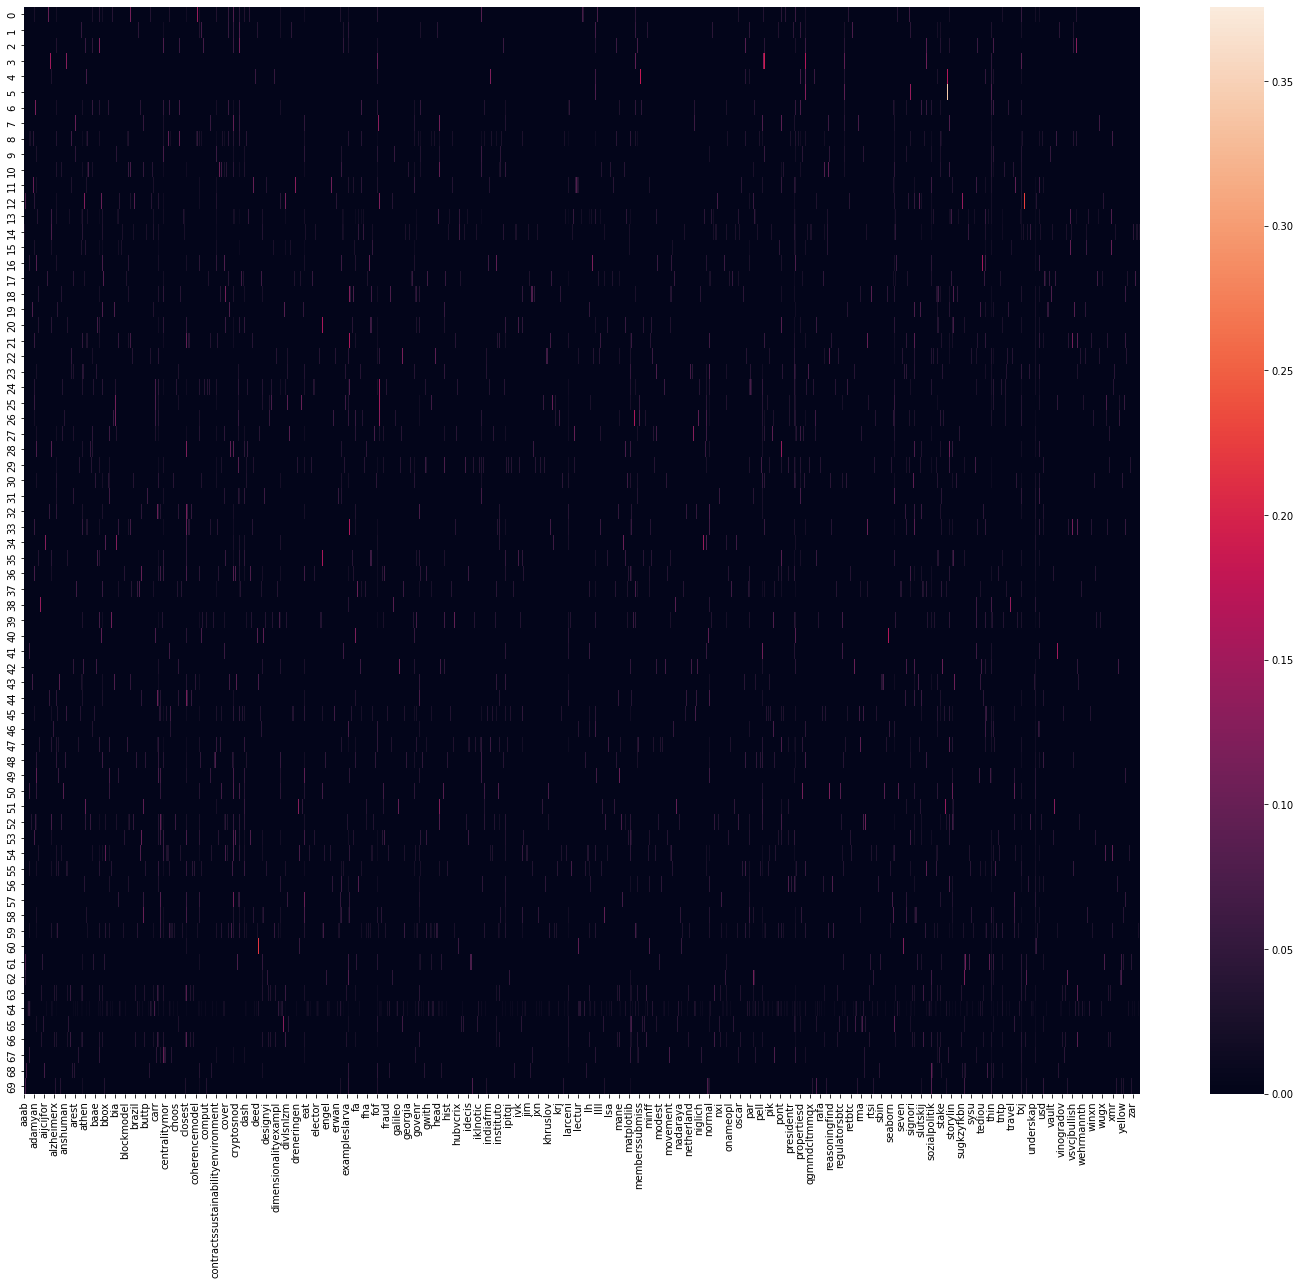

In [225]:
fig, ax = plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(xx_general)

In [218]:
lsa = TruncatedSVD(n_components=5)
X = X_general
X_lsa = lsa.fit_transform(X)

In [219]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
kmeanslsa = km.fit(X_lsa)
kmeanslsa_pred = km.predict(X_lsa)

In [220]:
pd.DataFrame(X_lsa)

,0,1,2,3,4
0,0.339595,-0.138294,-0.050922,-0.023952,-0.000684
1,0.256630,-0.242681,-0.281729,0.084077,0.126272
2,0.293814,-0.244915,-0.290579,0.040478,0.137325
3,0.182787,-0.184025,-0.276726,0.036200,0.092912
4,0.288836,-0.184116,-0.355041,0.007621,0.123764
...,...,...,...,...,...
65,0.288766,0.110083,0.006644,-0.127596,-0.185521
66,0.398896,0.456547,-0.054417,-0.003833,0.508011
67,0.331072,0.024437,0.072079,0.027655,-0.019270
68,0.213787,0.170697,-0.097511,-0.132723,-0.128212


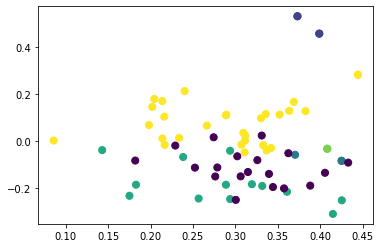

In [221]:
fig.set_size_inches(25,25)
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=kmeanslsa_pred, s=50)

